In [1]:
# 查看当前挂载的数据集目录, 该目录下的变更重启环境后会自动还原
# View dataset directory. 
# This directory will be recovered automatically after resetting environment. 
!ls /home/aistudio/data

In [2]:
import math
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.vq import kmeans
import cv2

In [3]:
dispose_dir = 'work'  # 数据集文件夹
save_path = 'out'  # 输出文件夹
try:
    os.mkdir(save_path)
except FileExistsError:
    pass

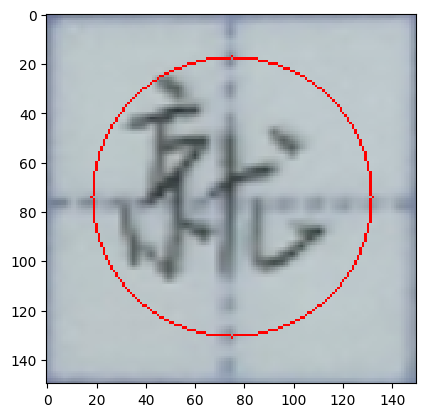

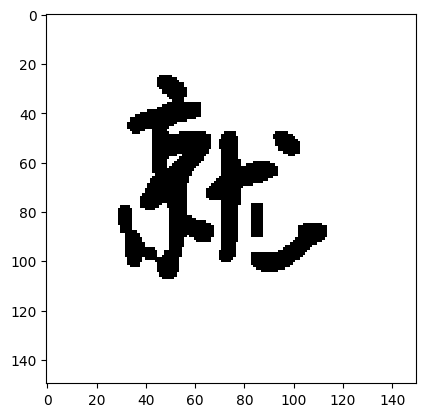

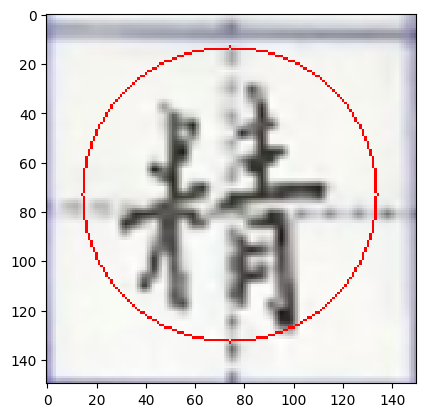

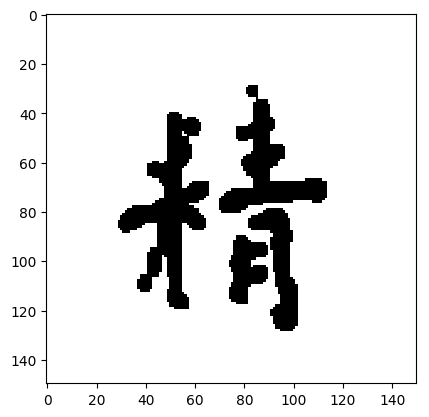

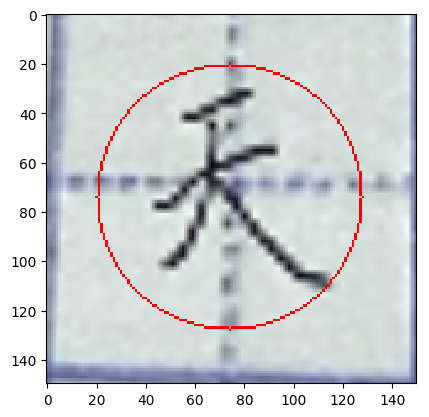

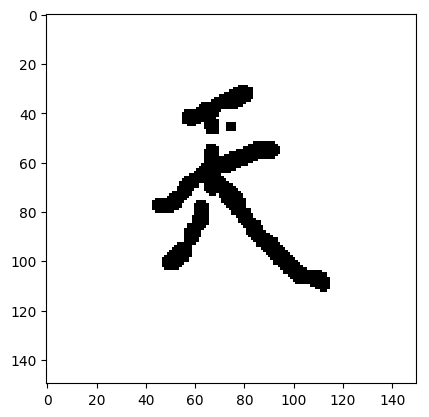

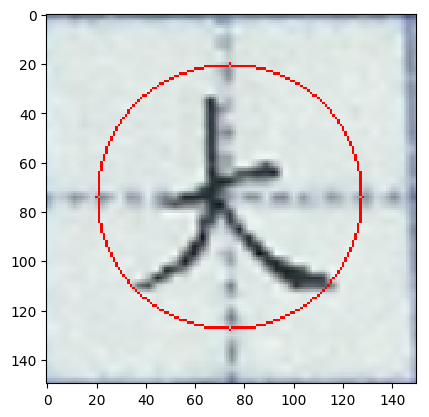

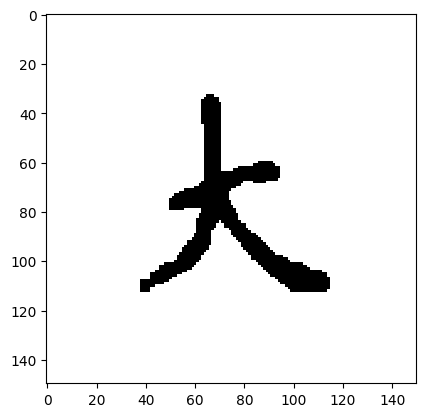

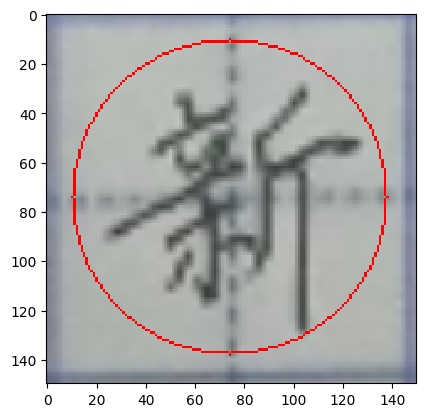

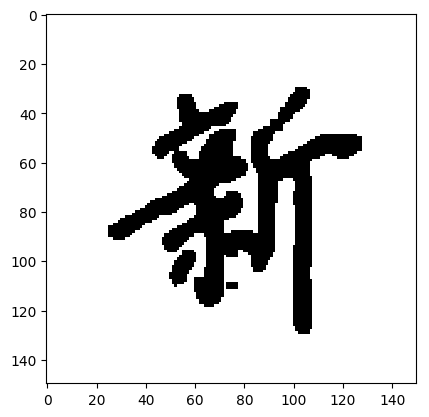

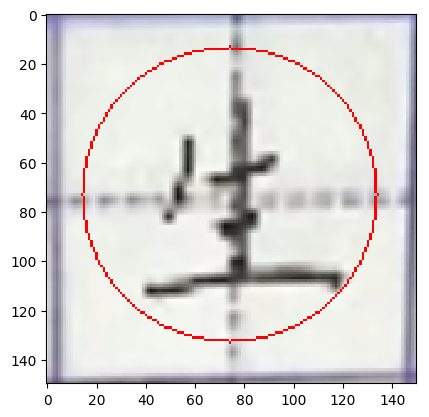

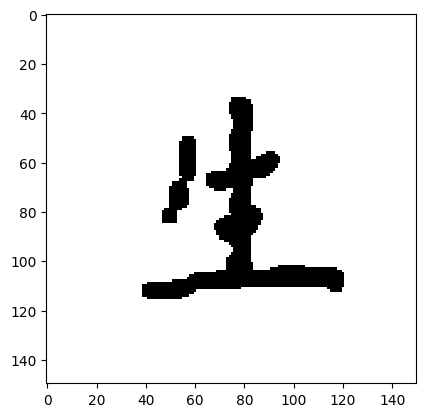

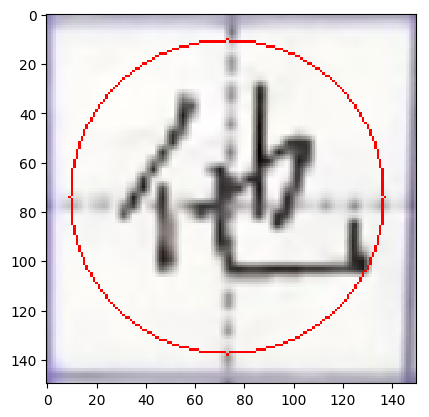

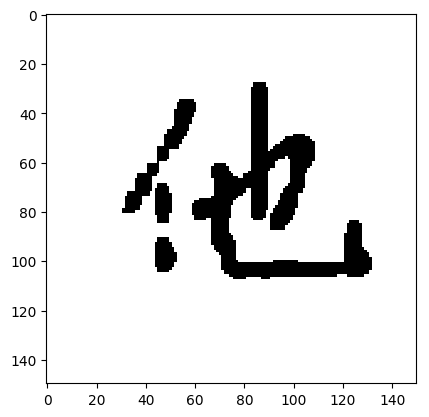

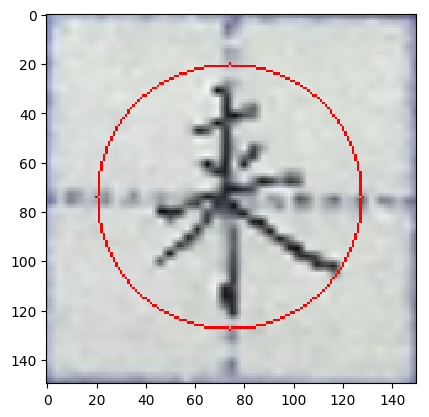

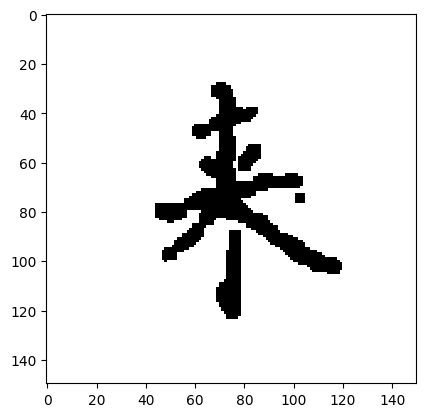

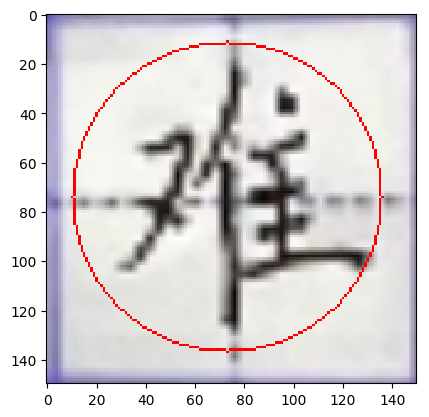

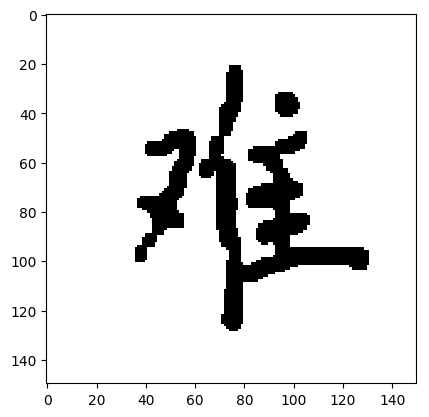

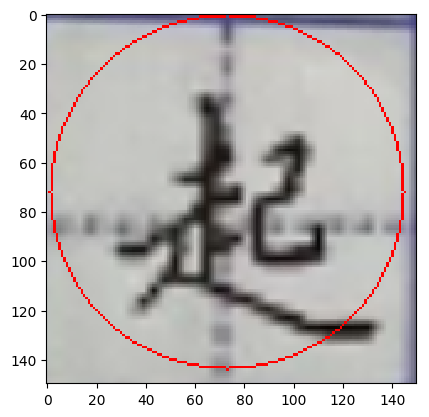

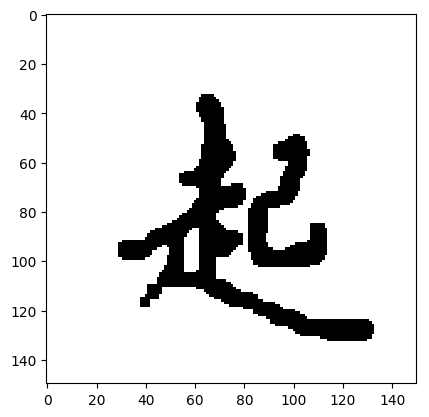

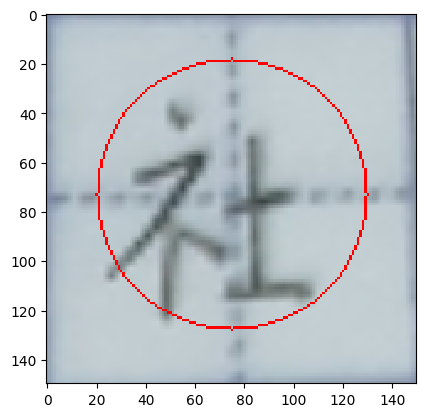

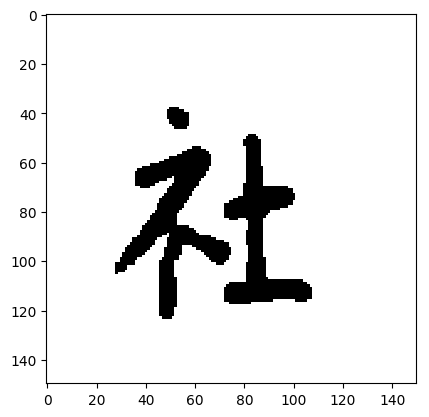

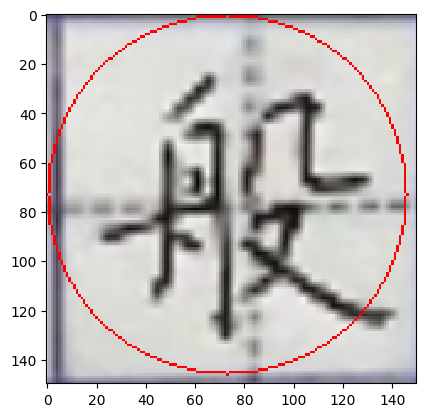

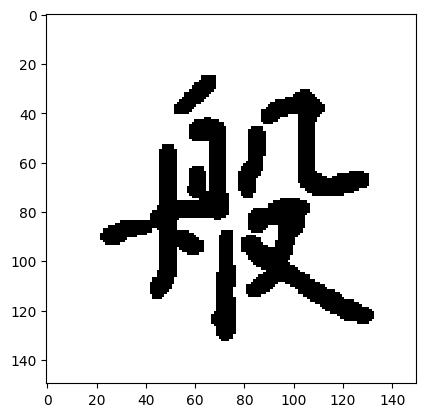

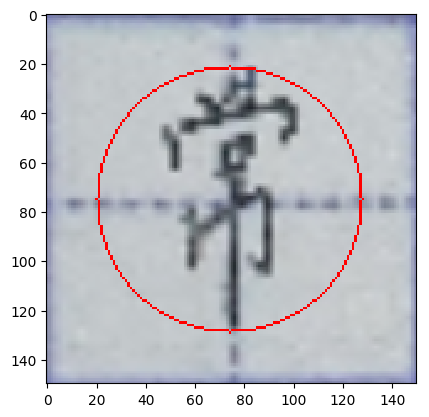

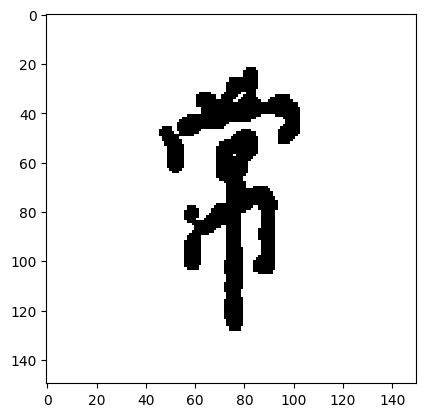

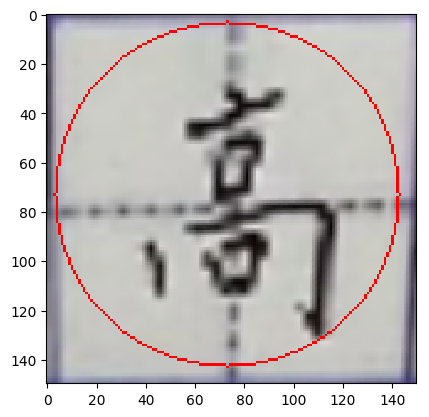

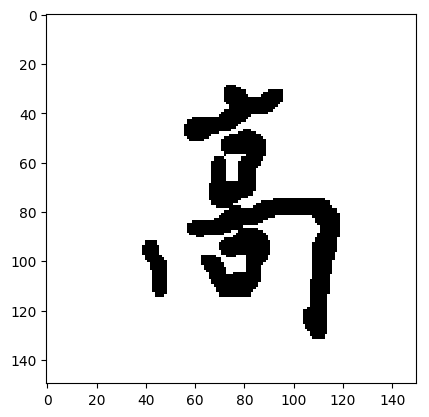

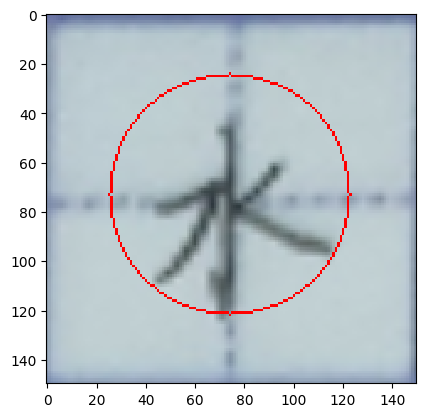

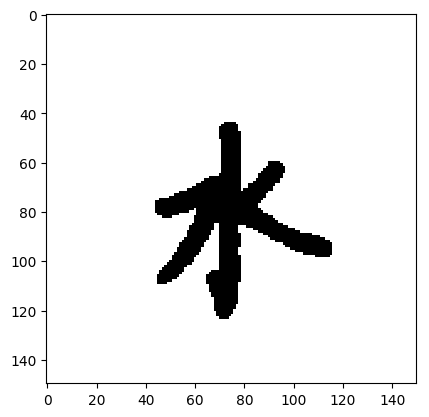

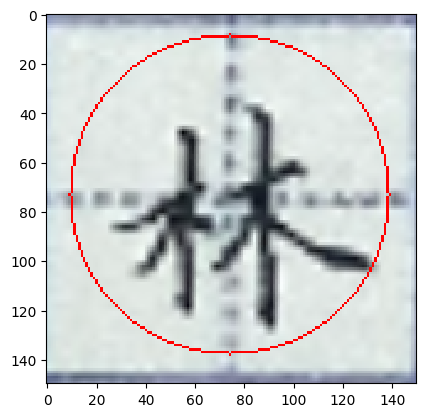

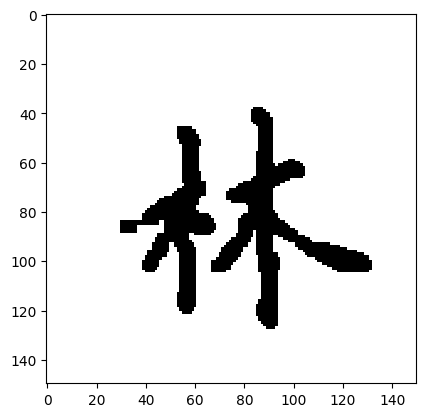

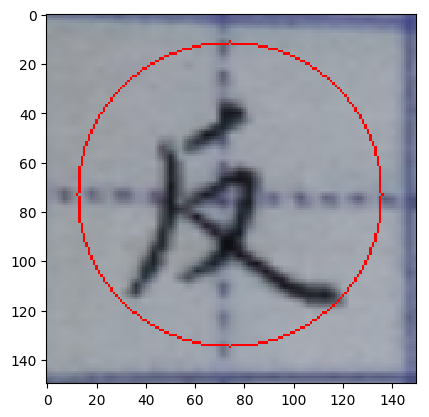

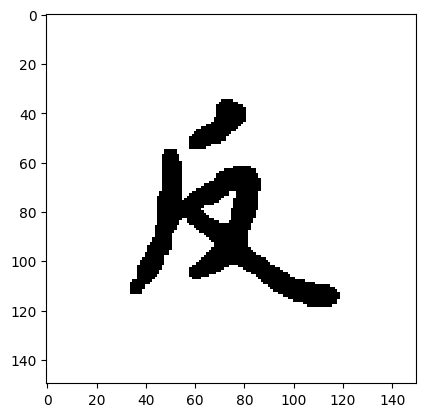

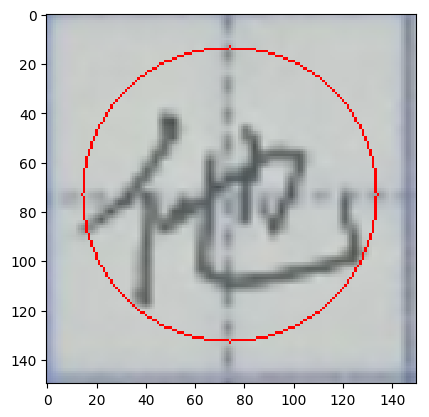

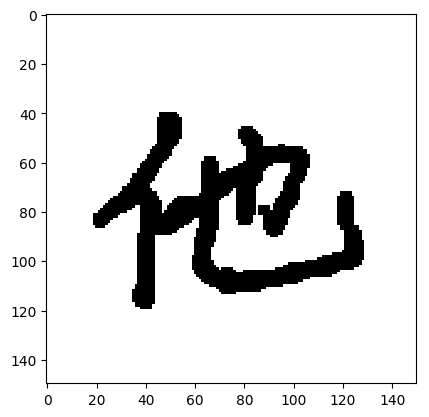

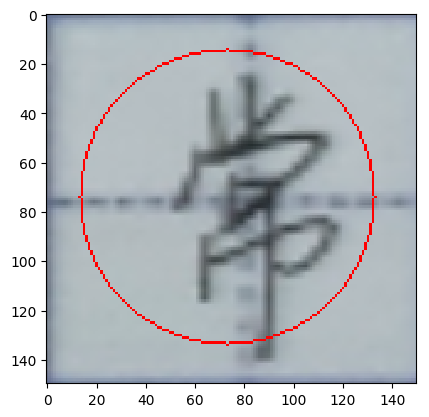

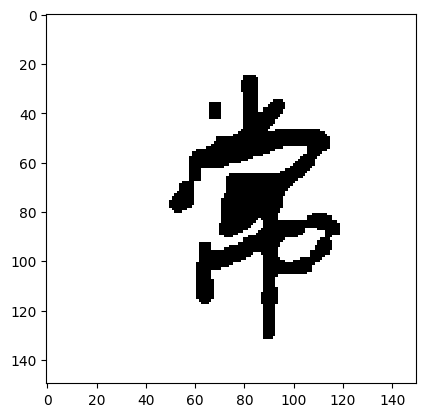

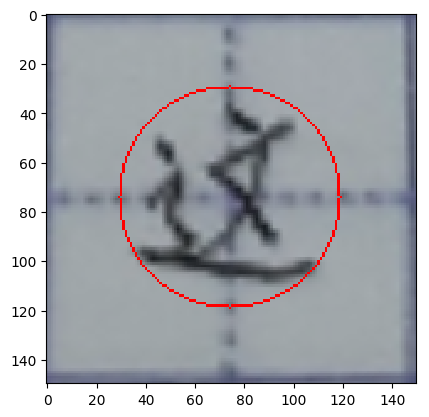

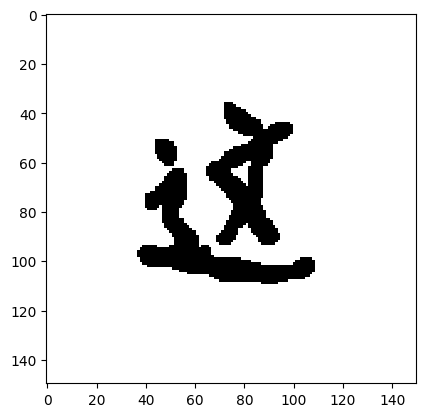

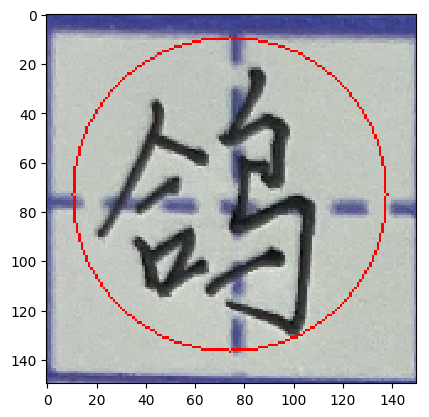

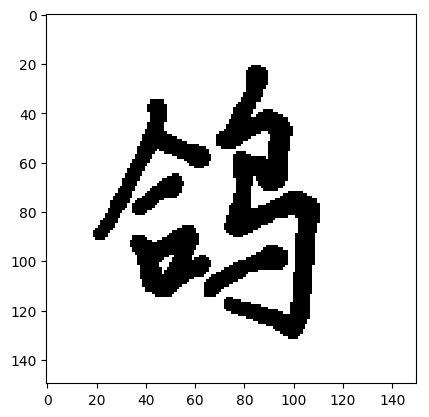

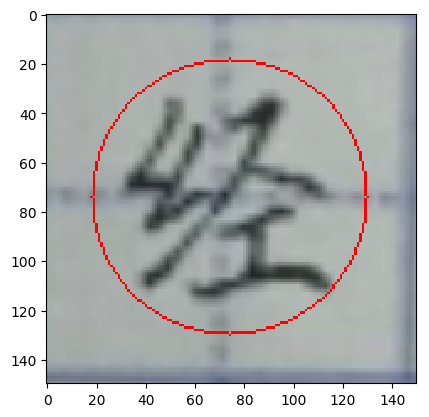

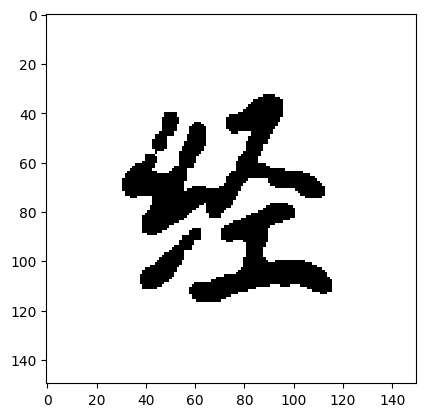

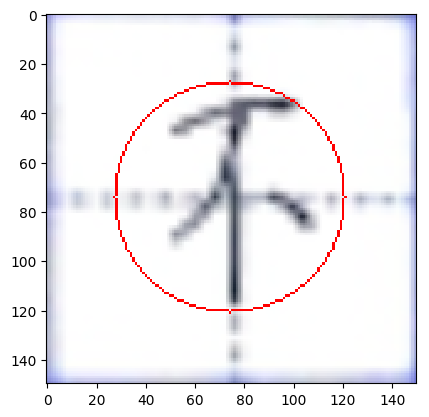

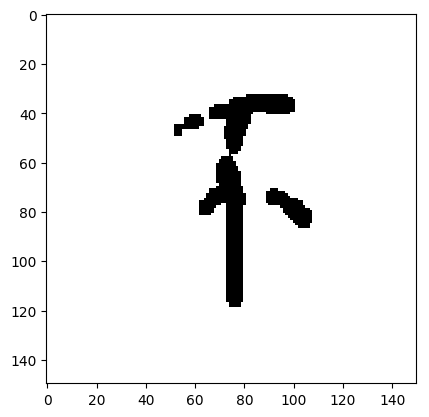

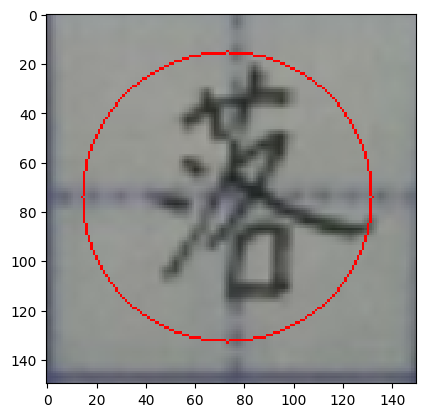

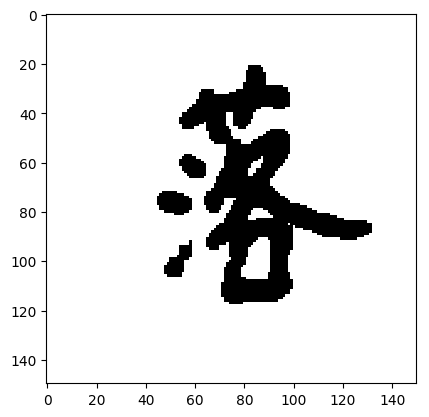

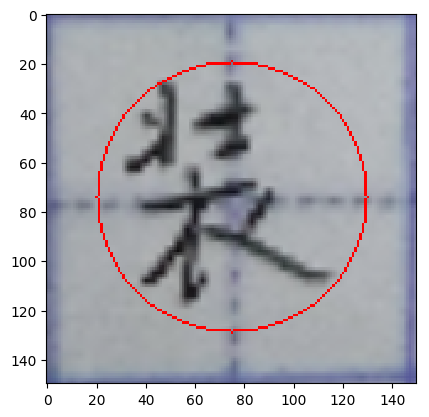

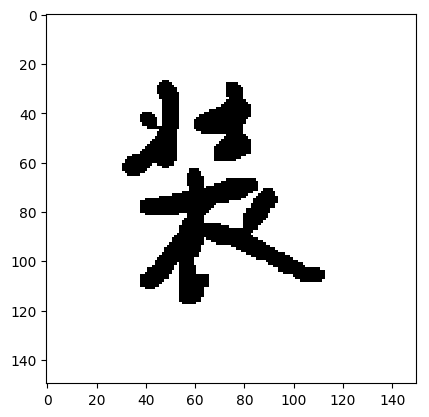

In [4]:
for pic in os.listdir(dispose_dir):
    # 读取图片并二值化，并将图片resize为150
    # print(os.path.join(dispose_dir, picroot))
    thisPicRoot = os.path.join(dispose_dir, pic)
    try:
        picOri = cv2.resize(cv2.imread(thisPicRoot), (150, 150))
        imgGray = cv2.resize(cv2.imread(thisPicRoot, 0), (150, 150))
    except:
        continue
    thisPicRoot = os.path.join(dispose_dir, pic)
    img = Image.open(thisPicRoot)
    w, h = img.size
    points = []
    for count, color in img.getcolors(w * h):
        points.append(color)
    fe = np.array(points, dtype=float)  # 聚类需要是Float或者Double
    book = np.array((fe[100], fe[1], fe[8], fe[8]))  # 聚类中心，初始值
    codebook, distortion = kmeans(fe, 3)  
    centers = np.array(codebook, dtype=int)  # 变为色彩，还得转为整数
    minRGB = 255 * 3
    judge = [255, 255, 255]
    for i in range(0, 3):
        if centers[i][1] + centers[i][2] + centers[i][0] < minRGB:
            minRGB = centers[i][1] + centers[i][2] + centers[i][0]
            judge = centers[i]
    for dx in range(0, 150):
        for dy in range(0, 150):
            c = picOri[dx, dy]
            dc = c - judge
            if dc[1]+dc[2]+dc[0]< 60:
                imgGray[dx, dy] = 0
            else:
                imgGray[dx, dy] = 255
            if dx < 20 or dx > 130 or dy < 20 or dy > 130:
                imgGray[dx, dy] = 255
    dst = cv2.blur(imgGray, (5, 5))
    for dx in range(10, 140):
        for dy in range(10, 140):
            if dst[dx, dy]<230:
               dst[dx, dy] = 0 
            else:
               dst[dx, dy] = 255 
    mask = dst
    # 计算图片的重心，作为图片的圆心
    M = cv2.moments(mask)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    # 计算圆的半径
    maxR = 0
    for dx in range(0, 150):
        for dy in range(0, 150):
            if mask[dx, dy] == 0 and (cX - dx) * (cX - dx) + (cY - dy) * (cY - dy) > maxR:
                maxR = (cX - dx) * (cX - dx) + (cY - dy) * (cY - dy)
    maxR = math.sqrt(maxR)
    maxR = min(cX, cY, 150 - cX, 150 - cY, maxR)
    # 在原图上绘制圆，展示结果以便于查看
    cv2.circle(picOri, (cX, cY), round(maxR), (255, 0, 0))
    plt.imshow(picOri)
    plt.show()
    # 结果图需要绘制的是黑色实心圆
    circlePic = picOri * 0 + 255
    cv2.circle(circlePic, (cX, cY), round(maxR), (0, 0, 0), -1)
    plt.imshow(dst)
    plt.show()
    cv2.imwrite(os.path.join(save_path, pic), dst)  # 保存提交图片
    cv2.imwrite(os.path.join(save_path, pic.split('.png')[0] + '-c.png'), circlePic)  # 保存提交图片


请点击[此处](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576)查看本环境基本用法.  <br>
Please click [here ](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576) for more detailed instructions. 